# Apprentissage Semi-Supervisé

On se propose dans ce TP d'illustrer certaines techniques d'apprentissage semi-supervisé vues en cours.

Dans tout ce qui suit, on considère que l'on dispose d'un ensemble de données $x_{lab}$ labellisées et d'un ensemble de donnés $x_{unlab}$ non labellisées.

## Datasets

Commencez par exécuter ces codes qui vos permettront de charger les datasets que nous allons utiliser et de les séparer en données labellisées et non labellisées, ainsi qu'en données de test.

### Dataset des deux clusters

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250):
  num_samples = num_lab + num_unlab + num_test
  # Génération de 1000 données du dataset des 2 lunes
  x, y = datasets.make_blobs(n_samples=[round(num_samples/2), round(num_samples/2)], n_features=2, center_box=(- 3, 3), random_state=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=num_test/num_samples, random_state=1)
  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=num_unlab/(num_unlab+num_lab), random_state=6)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test



(10, 2) (740, 2) (250, 2)
(10,) (740,) (250,)


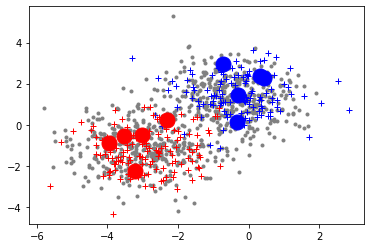

In [6]:
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250)

print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], color=(0.5,0.5,0.5), marker='.', linestyle=' ')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], color=(0.5,0.5,0.5), marker='.', linestyle=' ')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

### Dataset des 2 lunes


<img src="https://drive.google.com/uc?id=1xb_gasBJ6sEmbyvCWTnVEAsbspyDCyFL">
<caption><center> Figure 1: Comparaison de différents algorithmes semi-supervisés sur le dataset des 2 lunes</center></caption>

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250):
  num_samples = num_lab + num_unlab + num_test
  # Génération de 1000 données du dataset des 2 lunes
  x, y = datasets.make_moons(n_samples=num_samples, noise=0.1, random_state=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=num_test/num_samples, random_state=1)
  x_train_lab, x_train_unlab, y_train_lab, y_train_unlab = train_test_split(x_train, y_train, test_size=num_unlab/(num_unlab+num_lab), random_state=6)

  return x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test



(10, 2) (740, 2) (250, 2)
(10,) (740,) (250,)


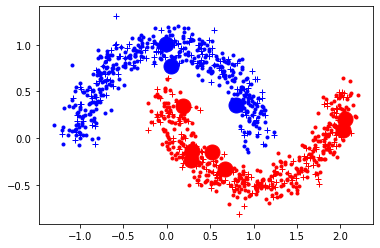

In [8]:
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2moons_dataset(num_lab = 10, num_unlab=740, num_test=250)

print(x_train_lab.shape, x_train_unlab.shape, x_test.shape)
print(y_train_lab.shape, y_train_unlab.shape, y_test.shape)

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

## Modèles

Nous allons dès maintenant préparer les modèles que nous utiliserons dans la suite.

**Travail à faire** Complétez les modèles ci-dessous :

Pour le dataset des 2 clusters, un simple perceptron monocouche suffira :

In [15]:
from tensorflow.keras.layers import *
from tensorflow.keras import Model, Input
# A COMPLETER
# Ici, écrire un simple perceptron monocouche
def create_model_2clusters():

  inputs = Input(shape=(2,))
  # A COMPLETER
  outputs = Dense(1, activation = 'sigmoid')(inputs)

  model = Model(inputs=inputs, outputs=outputs)

  return model

Pour le dataset des 2 lunes, implémentez un perceptron multi-couches à une couche cachée, par exemple de 20 neurones.

In [14]:
# A COMPLETER
# Ici, écrire un perceptron multi-couches à une seule couche cachée comprenant 20 neurones
def create_model_2moons():

  inputs = keras.Input(shape=(2,))

  # A COMPLETER

  x = Dense(20, activation='relu')(inputs)
  outputs = Dense(2, activation='sigmoid')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  return model

## Apprentissage supervisé

Commencez par bien lire le code ci-dessous, qui vous permet de mettre en place un apprentissage supervisé en détaillant la boucle d'apprentissage (de l'algorithme de descente de gradient stochastique). Cela nous permettra d'avoir plus de contrôle dans la suite pour implémenter les algorithmes semi-supervisés. Cela vous fournira également une base contre laquelle comparer les algorithmes semi-supervisés.

En quelques mots, l'algorithme est organisé autour d'une double boucle : une sur les *epochs*, et la 2nde sur les *mini-batches*.

Pour chaque nouveau batch de données, on réalise la succession d'étapes suivantes dans un bloc **GradientTape** qui permet le calcul automatique des gradients :     


1.   Prédiction de la sortie du modèle sur les données du batch
2.   Calcul de la fonction de perte entre sortie du réseau et labels réels associés aux élements du batch
3.   Calcul des gradients de la perte par rapport aux paramètres du réseau (par différentiation automatique)
4.   Mise à jour des paramètres grâce aux gradients calculés.



### Dataset des 2 clusters

In [16]:
import tensorflow as tf
from tensorflow import keras
import math

# Données et modèle du problème des 2 clusters
x_train_lab, y_train_lab, x_train_unlab, y_train_unlab, x_test, y_test = generate_2clusters_dataset(num_lab = 10, num_unlab=740, num_test=250)
model = create_model_2clusters()

# Hyperparamètres de l'apprentissage
epochs = 150
batch_size = 16
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.BinaryCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = keras.metrics.BinaryAccuracy()
test_acc_metric = keras.metrics.BinaryAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices)

  # Et on recommence à cumuler la loss
  cum_loss_value = 0

  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    print(np.shape(x_batch))
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  # Logits for this minibatch

      # Calcul de la fonction de perte sur ce batch
      loss_value = loss_fn(y_batch, y_pred)

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_states()
  test_acc_metric.reset_states()

2023-11-14 09:04:46.559843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 09:04:46.626704: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(10, 2)
Epoch    0 : Loss : 0.3092, Acc : 0.9000, Test Acc : 0.9560
(10, 2)
Epoch    1 : Loss : 0.3031, Acc : 0.9000, Test Acc : 0.9560
(10, 2)
Epoch    2 : Loss : 0.2971, Acc : 0.9000, Test Acc : 0.9560
(10, 2)
Epoch    3 : Loss : 0.2913, Acc : 0.9000, Test Acc : 0.9560
(10, 2)
Epoch    4 : Loss : 0.2856, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch    5 : Loss : 0.2801, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch    6 : Loss : 0.2747, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch    7 : Loss : 0.2695, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch    8 : Loss : 0.2644, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch    9 : Loss : 0.2594, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch   10 : Loss : 0.2546, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch   11 : Loss : 0.2499, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch   12 : Loss : 0.2453, Acc : 1.0000, Test Acc : 0.9600
(10, 2)
Epoch   13 : Loss : 0.2408, Acc : 1.0000, Test Acc : 0.9560
(10, 2)
Epoch   14 : Loss : 0.2365, Acc : 1.0000

Epoch  124 : Loss : 0.0802, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  125 : Loss : 0.0797, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  126 : Loss : 0.0793, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  127 : Loss : 0.0788, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  128 : Loss : 0.0784, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  129 : Loss : 0.0780, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  130 : Loss : 0.0775, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  131 : Loss : 0.0771, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  132 : Loss : 0.0767, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  133 : Loss : 0.0763, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  134 : Loss : 0.0758, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  135 : Loss : 0.0754, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  136 : Loss : 0.0750, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  137 : Loss : 0.0746, Acc : 1.0000, Test Acc : 0.9520
(10, 2)
Epoch  138 : Loss : 0.0742, Acc : 1.0000, Test A

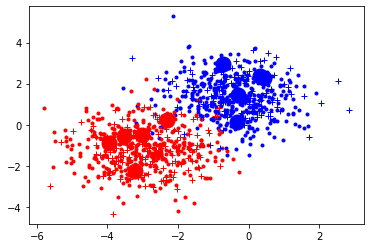

3888/3888 [==============================] - 3s 624us/step


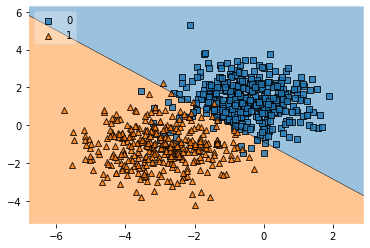

In [19]:
from mlxtend.plotting import plot_decision_regions

# Affichage des données
plt.plot(x_train_unlab[y_train_unlab==0,0], x_train_unlab[y_train_unlab==0,1], 'b.')
plt.plot(x_train_unlab[y_train_unlab==1,0], x_train_unlab[y_train_unlab==1,1], 'r.')

plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'b+')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'r+')

plt.plot(x_train_lab[y_train_lab==0,0], x_train_lab[y_train_lab==0,1], 'b.', markersize=30)
plt.plot(x_train_lab[y_train_lab==1,0], x_train_lab[y_train_lab==1,1], 'r.', markersize=30)

plt.show()

#Affichage de la frontière de décision
plot_decision_regions(x_train_unlab, y_train_unlab, clf=model, legend=2)
plt.show()

# Minimisation de l'entropie

Nous allons dans cette partie implémenter l'algorithme de minimisation de l'entropie de prédiction du modèle sur les données non labellisées, conjointement à la minimisation de l'entropie croisée sur les données labellisées.

Pour commencer, implémentez la fonction de coût qui calcule l'entropie $H$ des prédictions du réseau $\hat{y}$ :
$$ H(\hat{y}) = -  \hat{y} log(\hat{y}) - (1 - \hat{y}) log(1 - \hat{y})  $$

En réalité, nous travaillons sur des batches de $m$ échantillons ; pour obtenir l'entropie d'un batch $B$, il suffit de moyenner l'entropie de tous les échantillons du batch :

$$ H(B) = \frac{1}{m} \sum_{i=1}^{m} H(y^{(i)}) $$

In [20]:
import tensorflow as tf

# Calcul de l'entropie de y_pred
# A COMPLETER
def binary_entropy_loss(y_pred):
    y_pred_clipped = tf.clip_by_value(y_pred, 1e-7, 1e-7)
    return 

**ATTENTION: il faut gérer manuellement les cas où $\hat{y}$ vaudrait 0 ou 1, ce qui donnerait une valeur *NaN* à la fonction de coût.** Pour cela, vous pouvez utiliser la fonction [clip_by_value](https://www.tensorflow.org/api_docs/python/tf/clip_by_value) qui va vous permettre de circonscrire les valeurs de $\hat{y}$ à $[\epsilon , 1 - \epsilon ] $ (vous pouvez par exemple utiliser la valeur $\epsilon = 10^{-7}$).

**ATTENTION 2**: cette fonction de coût doit être dérivable et doit donc être implémentée uniquement en utilisant des fonctions de *Tensorflow* (et surtout pas *Numpy*) : *tf.reduce_mean()*, *tf.log()*, etc.

**Travail à faire** : Reprenez maintenant la boucle d'apprentissage supervisé et introduisez la minimisation d'entropie pour régulariser l'apprentissage.

La difficulté principale va être l'introduction des données non labellisées dans la boucle. Ainsi, un batch devra maintenant être composé de données labellisées et non labellisées. Je vous suggère de conserver le même nombre de données labellisées par batch que précédemment (i.e. 16) et de prendre un plus grand nombre de données non labellisées, par exemple 90.

N'oubliez pas également d'introduire un hyperparamètre λ pour contrôler l'équilibre entre perte supervisée et non supervisée. Utilisez un λ constant dans un premier temps, et testez ensuite des variantes qui consisteraient à augmenter progressivement sa valeur au fil des epochs.

La fonction objectif à minimiser aura donc la forme :    
$$  J = \sum_{(x,y) \in \mathcal{L}} CE(y, \hat{y}) + \lambda \sum_{x \in \mathcal{U}} H(\hat{y})	$$

Une fois cette étape réalisée, vous pouvez tester l'algorithme sur le dataset des 2 lunes ; comme annoncé en cours, vous devriez avoir beaucoup de mal à faire fonctionner l'algorithme sur ces données.
